In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
from itertools import product

In [2]:
X, y = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

1. Задание.

    Для реализованной в методичке модели градиентного бустинга построить зависимости ошибки от количества деревьев при разных значениях шага градиента на одном графике и для разной глубины деревьев на другом.
    Сделать выводы о зависимости ошибки от этих гиперпараметров (шаг градиента, максимальная глубина деревьев, количество деревьев).
    Подобрать оптимальные значения этих гиперпараметров (минимум ошибки на тесте при отсутствии переобучения).


In [3]:
def gb_predict(X, trees_list, coef_list, eta):
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

def bias(y, z):
    return (y - z)

def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    trees = []
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        
        if len(trees) == 0:
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            target = gb_predict(X_train, trees, coefs, eta)

            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors



n_trees      = [10, 20, 50, 100]
etas         = [5e-1, 5e-2, 5e-3, 5e-4]
n_parameters = len(n_trees)
parameters   = list(product(n_trees, etas))
coefs        = [[1] * nt for nt, _ in parameters]
max_depth    = 3

trees        = []
train_errors = []
test_errors  = []

for i, (nt, eta) in enumerate(parameters):
    ts, tnes, ttes = gb_fit(nt, max_depth, X_train, X_test, y_train, y_test, coefs[i], eta)
    
    trees.append(ts)
    train_errors.append(tnes)
    test_errors.append(ttes)
    print(f'Done with a Gradient Boosting with parameters: n_trees={nt}, eta={eta}')

Done with a Gradient Boosting with parameters: n_trees=10, eta=0.5
Done with a Gradient Boosting with parameters: n_trees=10, eta=0.05
Done with a Gradient Boosting with parameters: n_trees=10, eta=0.005
Done with a Gradient Boosting with parameters: n_trees=10, eta=0.0005
Done with a Gradient Boosting with parameters: n_trees=20, eta=0.5
Done with a Gradient Boosting with parameters: n_trees=20, eta=0.05
Done with a Gradient Boosting with parameters: n_trees=20, eta=0.005
Done with a Gradient Boosting with parameters: n_trees=20, eta=0.0005
Done with a Gradient Boosting with parameters: n_trees=50, eta=0.5
Done with a Gradient Boosting with parameters: n_trees=50, eta=0.05
Done with a Gradient Boosting with parameters: n_trees=50, eta=0.005
Done with a Gradient Boosting with parameters: n_trees=50, eta=0.0005
Done with a Gradient Boosting with parameters: n_trees=100, eta=0.5
Done with a Gradient Boosting with parameters: n_trees=100, eta=0.05
Done with a Gradient Boosting with parame

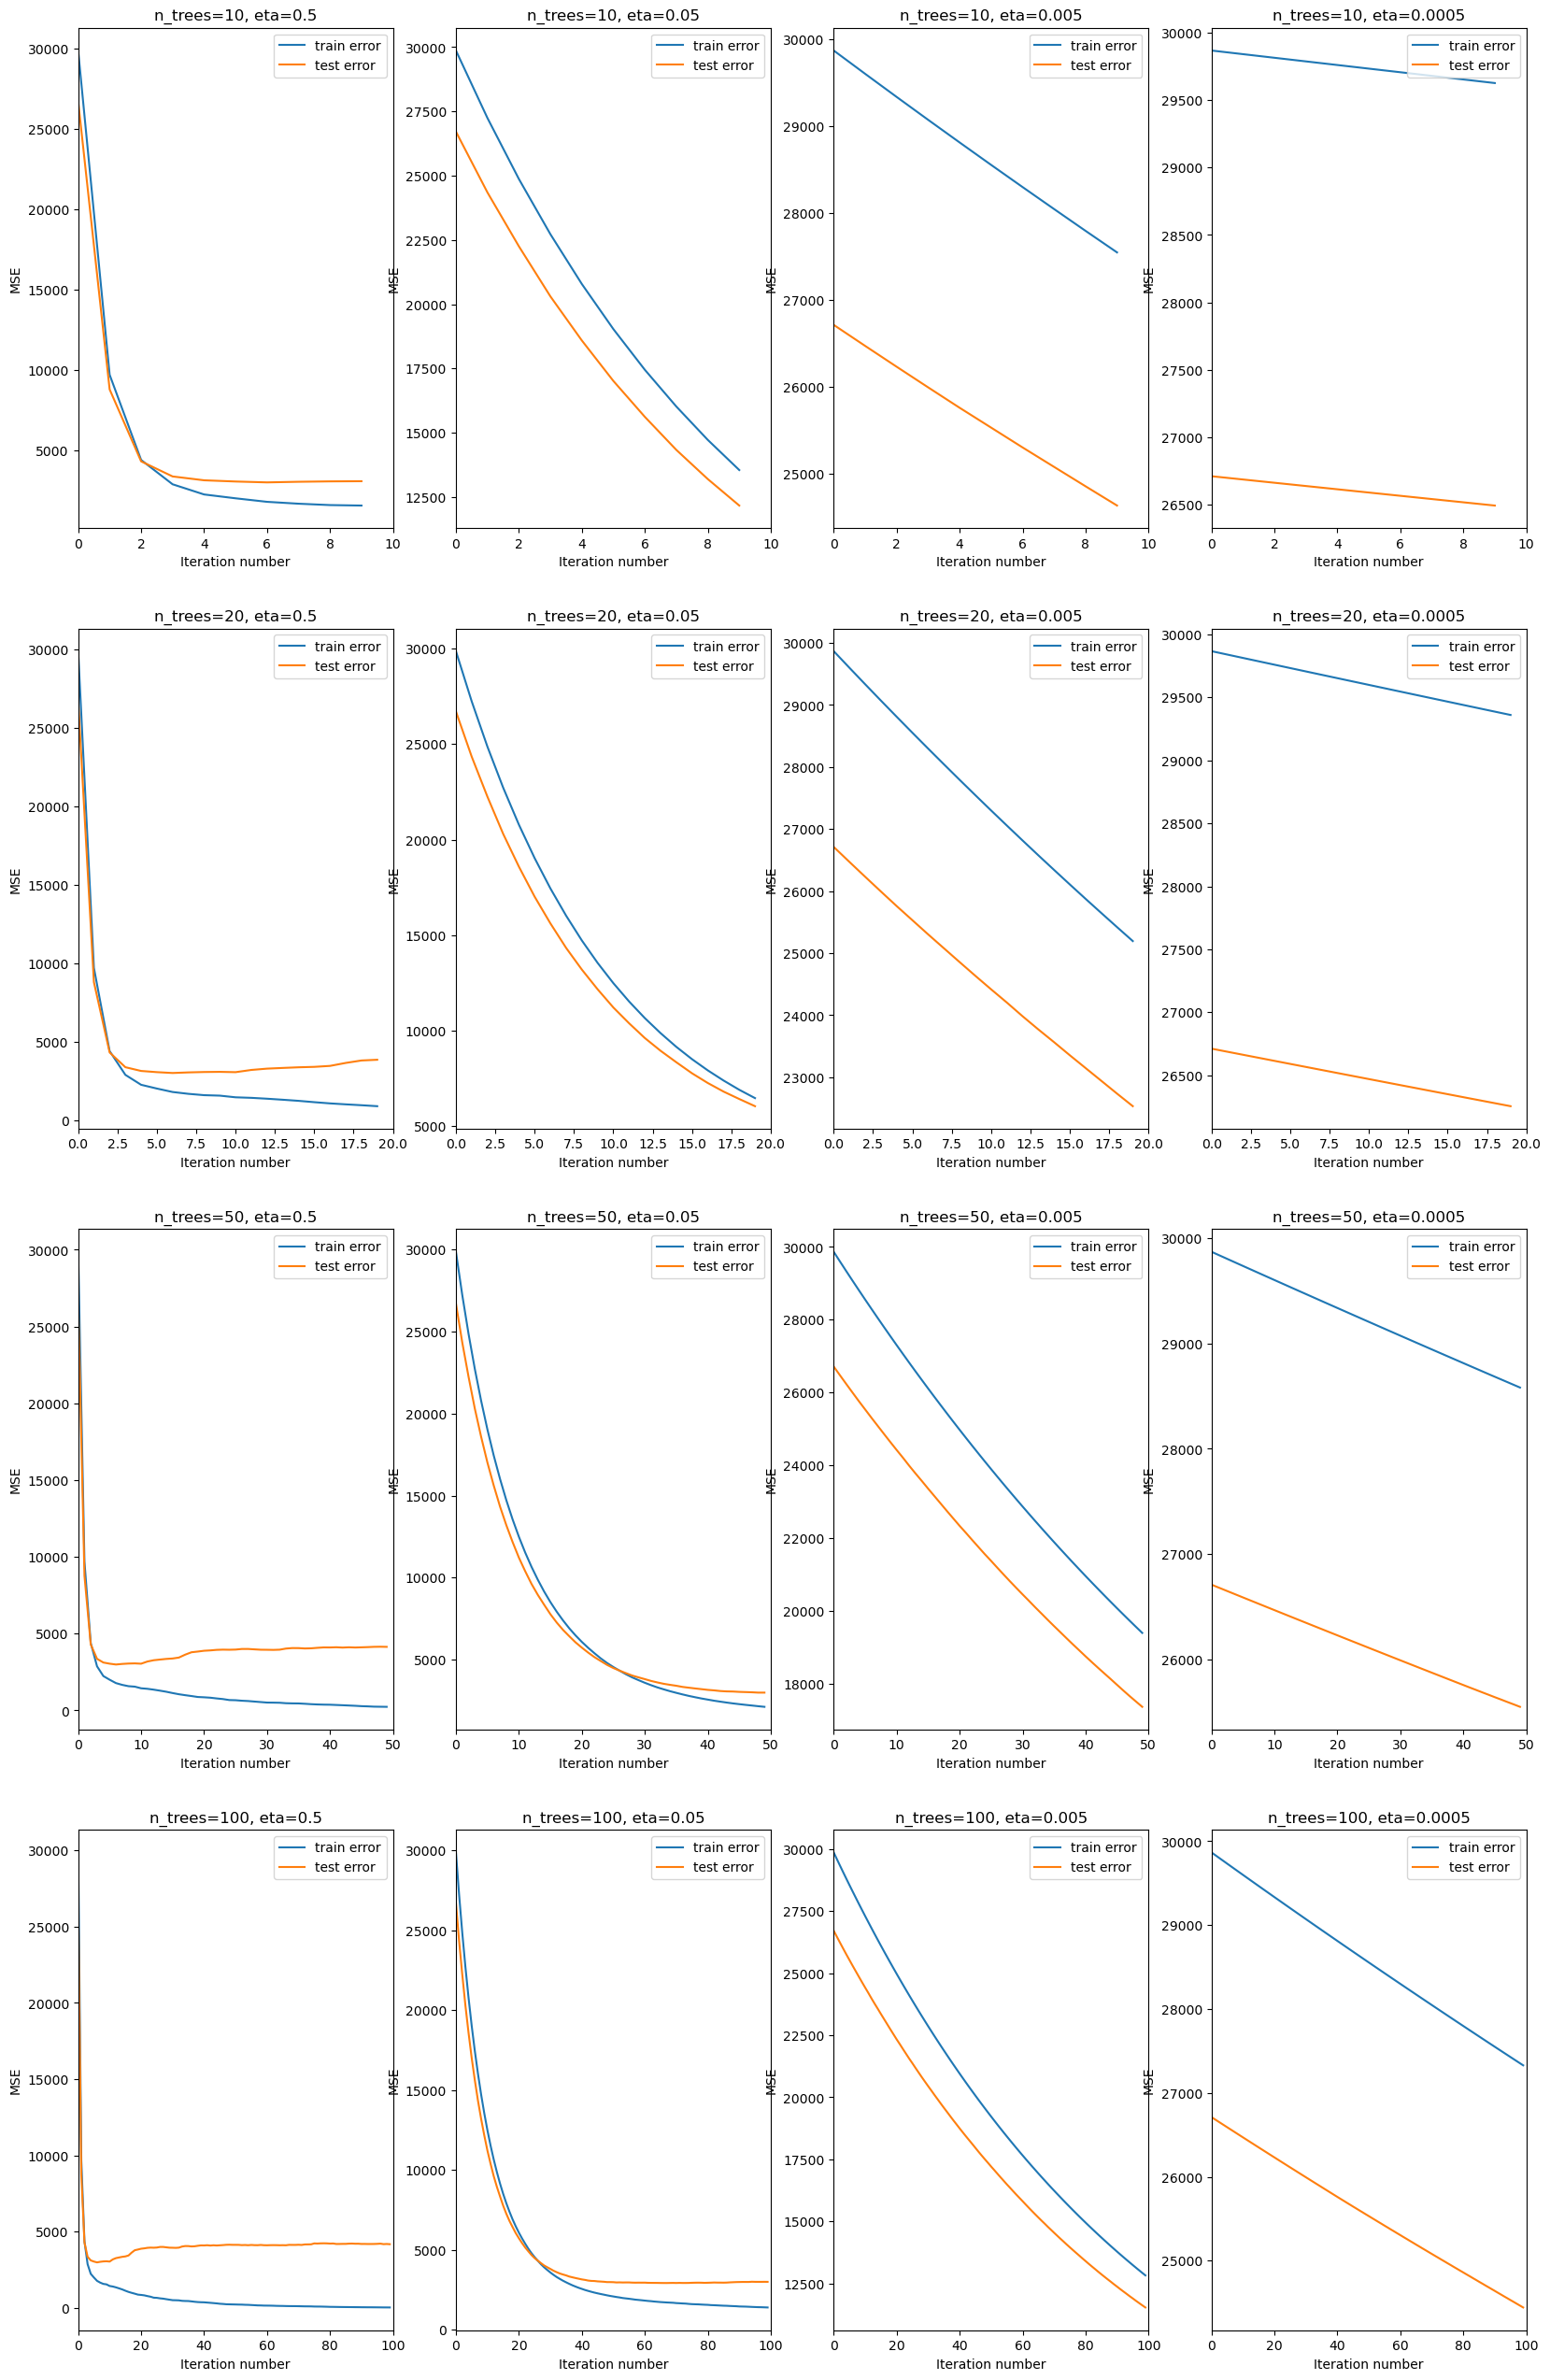

In [4]:
fig, ax = plt.subplots(n_parameters, n_parameters, figsize=(20, 32))

for i, (nt, eta) in enumerate(parameters):
    row, column = i // n_parameters, i % n_parameters
    
    ax[row, column].set_title(f'n_trees={nt}, eta={eta}')
    ax[row, column].set_xlabel('Iteration number')
    ax[row, column].set_ylabel('MSE')
    ax[row, column].set_xlim(0, nt)
    ax[row, column].plot(list(range(nt)), train_errors[i], label='train error')
    ax[row, column].plot(list(range(nt)), test_errors[i], label='test error')
    ax[row, column].legend(loc='upper right')

__Вывод__: До минимума можно дойти с меньшим количеством моделей, но с большим learning_rate, и наоборот.